# 유방암 진단 분류

## 1.유방암 데이터셋 설명
- 데이터 크기 : 569개
- 클래스 : 2개
  - 0 : 악성 종양 (암성, 212개)
  - 1 : 양성 종양 (비암성, 357개)
- 피처 : 30개
  - mean radius: 평균 반지름
  - mean texture: 평균 질감 (그레이스케일 강도의 변화)
  - mean perimeter: 평균 둘레
  - mean area: 평균 면적
  - mean smoothness: 평균 매끄러움 (둘레 길이의 로컬 변동)
  - mean compactness: 평균 밀집도
  - mean concavity: 평균 오목함
  - mean concave points: 평균 오목한 점의 수
  - mean symmetry: 평균 대칭성
  - mean fractal dimension: 평균 프랙탈 차원 (둘레의 '거칠기')  
  ...

## 2.필요 라이브러리 임포트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

## 3.데이터 로드 및 확인

In [15]:
# 데이터셋 로드
breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

In [16]:
# 데이터프레임으로 변환 (분석 및 시각화를 위해)
data = pd.DataFrame(X, columns=breast_cancer.feature_names)
data['target'] = y

In [17]:
# 데이터셋 확인
print(data.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [18]:
# 데이터 내용 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [19]:
# 데이터 통계량 확인
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## 4.데이터 분할

In [20]:
# 데이터 분할 (훈련용과 테스트용)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

## 5.SVM 모델 학습

In [21]:
# SVM 모델 학습 (선형 커널)
model_linear = SVC(kernel='linear', C=1.0, random_state=10)
model_linear.fit(X_train, y_train)

SVC(kernel='linear', random_state=10)

## 6.예측

In [10]:
# 예측
y_pred_linear = model_linear.predict(X_test)

## 7.성능 평가

In [11]:
# 성능 평가
# 정확도
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Accuracy (Linear SVM): {accuracy_linear:.4f}")

Accuracy (Linear SVM): 0.9386


In [12]:
print("Classification Report (Linear SVM):")
print(classification_report(y_test, y_pred_linear, target_names=breast_cancer.target_names))

Classification Report (Linear SVM):
              precision    recall  f1-score   support

   malignant       0.93      0.90      0.92        42
      benign       0.95      0.96      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



Confusion Matrix (Linear SVM):
[[38  4]
 [ 3 69]]


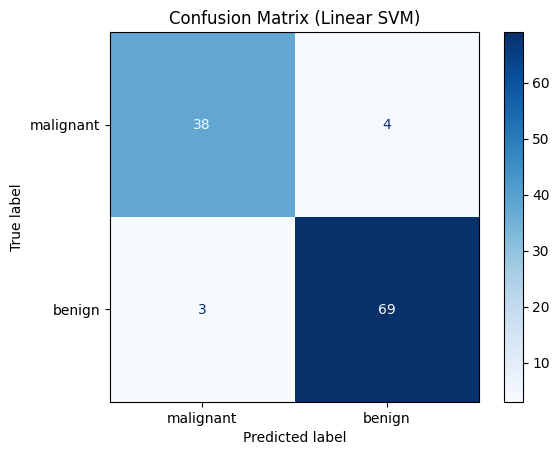

In [13]:
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)
print("Confusion Matrix (Linear SVM):")
print(conf_matrix_linear)

disp_linear = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_linear, display_labels=breast_cancer.target_names)
disp_linear.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Linear SVM)")
plt.show()

## 8.SVM 시각화
그리드 생성
  - X[:, 0]: 데이터의 첫 번째 특성(첫 번째 열)
  - X[:, 1]: 데이터의 두 번째 특성(두 번째 열)
  - x_min과 x_max: 첫 번째 특성의 최소값과 최대값을 구한 후, 약간의 여유 공간을 추가하여 그리드의 x축 범위를 설정.
  - y_min과 y_max: 두 번째 특성의 최소값과 최대값을 구한 후, 약간의 여유 공간을 추가하여 그리드의 y축 범위를 설정.
  - np.meshgrid: x축과 y축의 값을 바탕으로 그리드를 생성합니다. 이 그리드는 결정 경계를 예측하는 데 사용.

모델의 결정 경계 예측:
  - np.c_[xx.ravel(), yy.ravel()]: 그리드의 모든 좌표 쌍을 일렬로 펼쳐 모델에 입력.
  - model.predict(...): 모델이 각 그리드 포인트에 대해 예측을 수행.
  - Z: 예측 결과로 얻은 결정 경계.
  - Z.reshape(xx.shape): 예측 결과를 그리드의 형상에 맞게 다시 배열.

결정 경계 그리기
  - plt.contourf(...): 그리드의 결정 경계를 채워서 그림으로 그림. alpha=0.4는 결정 경계의 투명도를 설정하며, cmap=plt.cm.coolwarm는 색상 맵을 설정.

  - plt.scatter(...): 실제 데이터 포인트를 산점도로 표현. c=y는 데이터 포인트의 색을 실제 클래스 레이블에 따라 설정하며, s=20은 점의 크기를 설정.

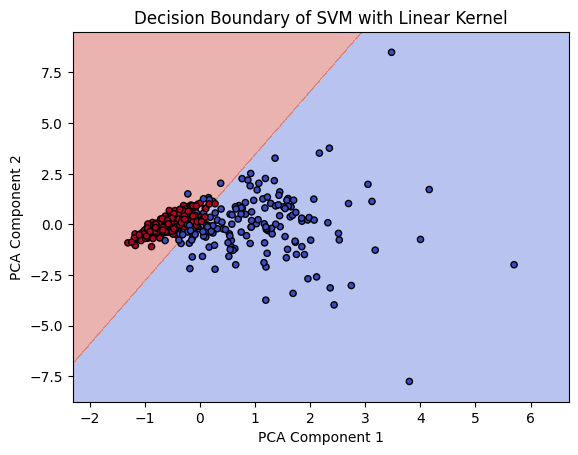

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# 데이터를 2차원으로 축소 (PCA 사용)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=10)

# 데이터 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVM 모델 학습 (선형 커널)
model = SVC(kernel="linear", C=1.0, random_state=10)
model.fit(X_train, y_train)

# 결정 경계 시각화 함수
def plot_decision_boundary(X, y, model):
    # 그리드 생성
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # 모델의 결정 경계 예측
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 결정 경계 그리기
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title("Decision Boundary of SVM with Linear Kernel")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()

# 결정 경계 시각화
plot_decision_boundary(X_train, y_train, model)

## 9.피처 중요도 확인

In [22]:
# 피처 중요도 확인
print("Feature coefficients (Linear SVM):", model_linear.coef_)

Feature coefficients (Linear SVM): [[ 1.23549787  0.0692024  -0.26864997  0.01519938 -0.19614698 -0.25058111
  -0.61998976 -0.34042873 -0.25620761 -0.03581845 -0.20192867  1.01007618
   0.14798707 -0.09172413 -0.02588237  0.04052257 -0.07745531 -0.04326405
  -0.02717312  0.00299526  0.25903531 -0.29354632 -0.06296419 -0.00958545
  -0.3226401  -0.35868062 -1.29163882 -0.56469993 -0.6956583  -0.07141176]]


In [23]:
# 피처 이름과 함께 계수 출력
feature_names = breast_cancer.feature_names  # 피처 이름 가져오기
coefficients = model_linear.coef_.flatten()  # 계수 가져오기

# 피처 이름과 계수를 함께 출력
for feature_name, coef in zip(feature_names, coefficients):
    print(f"{feature_name}: {coef:.4f}")


mean radius: 1.2355
mean texture: 0.0692
mean perimeter: -0.2686
mean area: 0.0152
mean smoothness: -0.1961
mean compactness: -0.2506
mean concavity: -0.6200
mean concave points: -0.3404
mean symmetry: -0.2562
mean fractal dimension: -0.0358
radius error: -0.2019
texture error: 1.0101
perimeter error: 0.1480
area error: -0.0917
smoothness error: -0.0259
compactness error: 0.0405
concavity error: -0.0775
concave points error: -0.0433
symmetry error: -0.0272
fractal dimension error: 0.0030
worst radius: 0.2590
worst texture: -0.2935
worst perimeter: -0.0630
worst area: -0.0096
worst smoothness: -0.3226
worst compactness: -0.3587
worst concavity: -1.2916
worst concave points: -0.5647
worst symmetry: -0.6957
worst fractal dimension: -0.0714


## 2.Recursive Feature Elimination (RFE)
- SVM과 결합하여 중요하지 않은 피처를 제거하는 방법.

In [26]:
from sklearn.feature_selection import RFE

# RFE를 사용하여 피처 선택 (5개의 피처 선택)
rfe = RFE(model_linear, n_features_to_select=15)
rfe.fit(X_train, y_train)

# 선택된 피처 확인
selected_features = rfe.support_
selected_feature_names = breast_cancer.feature_names[selected_features]
print("Selected Features:", selected_feature_names)

# 선택된 피처만으로 새로운 데이터셋 생성
X_train_rfe = X_train[:, selected_features]
X_test_rfe = X_test[:, selected_features]

# 선택된 피처들만으로 모델 재학습
model_rfe = SVC(kernel='linear', random_state=10)
model_rfe.fit(X_train_rfe, y_train)

# 예측 및 정확도 계산
y_pred_rfe = model_rfe.predict(X_test_rfe)
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)
print(f"Accuracy with selected features: {accuracy_rfe:.4f}")

Selected Features: ['mean radius' 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'radius error' 'texture error'
 'worst texture' 'worst perimeter' 'worst smoothness' 'worst compactness'
 'worst concavity' 'worst concave points' 'worst symmetry']
Accuracy with selected features: 0.9474


## 3.Recursive Feature Elimination with Cross-Validation (RFECV)
- 교차 검증을 사용하여 최적의 피처 개수를 자동으로 선택

In [25]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC

# 선형 SVM 모델
model = SVC(kernel='linear', random_state=42)

# RFECV를 사용하여 최적의 피처 개수 선택
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train, y_train)

# 최적의 피처 개수와 선택된 피처 확인
optimal_num_features = rfecv.n_features_
selected_features = rfecv.support_

print(f"Optimal number of features: {optimal_num_features}")
print("Selected Features:", breast_cancer.feature_names[selected_features])

# 선택된 피처들로 모델 평가
X_train_rfecv = X_train[:, selected_features]
X_test_rfecv = X_test[:, selected_features]
model_rfecv = SVC(kernel='linear', random_state=10)
model_rfecv.fit(X_train_rfecv, y_train)
y_pred_rfecv = model_rfecv.predict(X_test_rfecv)
accuracy_rfecv = accuracy_score(y_test, y_pred_rfecv)

print(f"Accuracy with selected features: {accuracy_rfecv:.4f}")


Optimal number of features: 14
Selected Features: ['mean radius' 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'radius error' 'texture error'
 'worst texture' 'worst perimeter' 'worst smoothness' 'worst concavity'
 'worst concave points' 'worst symmetry']
Accuracy with selected features: 0.9474


## 10.추가적인 분석

- 그리디 서치를 통해서 하이퍼 파라미터 최적화
1. C (Regularization Parameter)
  - C 파라미터는 SVM에서 규제(regularization) 강도를 제어하는 매개변수. C 값이 크면, 모델은 학습 데이터에 더 잘 맞추려고 하며, 오차에 대해 덜 관대해짐. 반대로 C 값이 작으면, 모델은 일부 오차를 허용하면서 보다 단순한 결정 경계를 찾으려고 함.
값이 큰 경우 (C=100):
모델이 학습 데이터에 과적합될 가능성이 높아집니다.
오차를 최소화하려는 경향이 강해져, 복잡한 결정 경계가 만들어질 수 있습니다.
값이 작은 경우 (C=0.1):
모델이 좀 더 일반화된 결정을 내리며, 과적합을 방지할 수 있습니다.
일부 오차를 허용하며, 결정 경계가 단순해질 수 있습니다.
2. gamma (Kernel Coefficient)
  - gamma 파라미터는 비선형 SVM에서 사용되는 커널 함수의 범위를 제어. 주로 RBF(Radial Basis Function) 커널에서 사용되며, 각 데이터 포인트의 영향 범위를 결정.
  - 값이 큰 경우 (gamma=1):
  각 데이터 포인트의 영향 범위가 좁아져, 모델이 데이터 포인트의 위치에 민감해지고, 복잡한 결정 경계가 생성될 수 있음. 이 경우 모델이 과적합될 가능성이 커집니다.
  - 값이 작은 경우 (gamma=0.001):
  각 데이터 포인트의 영향 범위가 넓어져, 모델이 더 부드럽고 단순한 결정 경계를 형성하게 됨. 과적합을 피할 수 있지만, 너무 작은 값은 모델이 데이터를 제대로 학습하지 못할 수 있음.
3. kernel (Kernel Type)
  - kernel 파라미터는 SVM이 사용하는 커널 함수의 종류를 지정.
옵션:
  - 'linear': 선형 커널. 데이터가 선형적으로 구분 가능한 경우에 사용. 계산이 빠르고, 데이터가 고차원일 때도 잘 동작합니다.
  - 'rbf': RBF 커널(가우시안 커널). 데이터가 비선형적으로 구분되는 경우에 사용. 데이터의 복잡한 패턴을 학습할 수 있음.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 그리드 서치에서 사용할 파라미터 그리드 정의
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf','linear']
}

# GridSearchCV 설정 및 학습
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

# 최적의 파라미터 및 모델 출력
print(f"Best Parameters: {grid.best_params_}")
print(f"Best Estimator: {grid.best_estimator_}")

# 최적의 파라미터로 예측 수행 및 정확도 계산
y_pred = grid.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy with best parameters: {accuracy:.4f}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.2s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.3s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.2s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.